In [1]:
import tensorflow as tf
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.preprocessing
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.callbacks import EarlyStopping
from keras.layers import Dense,Dropout,SimpleRNN,LSTM,GRU
from keras.models import Sequential
from tensorflow import keras

In [2]:
# Load your dataset
# Assuming your dataset has columns 'datetime', 'total_visitor', 'total_accomodation'
# Adjust the file path accordingly

data = pd.read_csv('KepRiau 2015 - 2022.csv')

# Convert 'datetime' column to datetime type
data['datetime'] = pd.to_datetime(data['datetime'])

# Set 'datetime' column as index
data.set_index('datetime', inplace=True)

# Normalize the data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Define your input and output variables
X = data_scaled[:, 1]  # 'total_accomodation' as input
y = data_scaled[:, 0]  # 'total_visitor' as output



TEST SIZE 80: 20

In [16]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [18]:
# Reshape data 
X_train = X_train.reshape((X_train.shape[0], 1, 1))
X_test = X_test.reshape((X_test.shape[0], 1, 1))

In [19]:
# Build and Train the RNN Model
model = Sequential()
model.add(SimpleRNN(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=2)

Epoch 1/50
3/3 - 1s - loss: 0.4431 - val_loss: 0.1417 - 1s/epoch - 460ms/step
Epoch 2/50
3/3 - 0s - loss: 0.3846 - val_loss: 0.0989 - 39ms/epoch - 13ms/step
Epoch 3/50
3/3 - 0s - loss: 0.3315 - val_loss: 0.0665 - 33ms/epoch - 11ms/step
Epoch 4/50
3/3 - 0s - loss: 0.2836 - val_loss: 0.0443 - 44ms/epoch - 15ms/step
Epoch 5/50
3/3 - 0s - loss: 0.2407 - val_loss: 0.0315 - 34ms/epoch - 11ms/step
Epoch 6/50
3/3 - 0s - loss: 0.2030 - val_loss: 0.0276 - 35ms/epoch - 12ms/step
Epoch 7/50
3/3 - 0s - loss: 0.1721 - val_loss: 0.0315 - 45ms/epoch - 15ms/step
Epoch 8/50
3/3 - 0s - loss: 0.1452 - val_loss: 0.0424 - 37ms/epoch - 12ms/step
Epoch 9/50
3/3 - 0s - loss: 0.1212 - val_loss: 0.0587 - 46ms/epoch - 15ms/step
Epoch 10/50
3/3 - 0s - loss: 0.1047 - val_loss: 0.0800 - 36ms/epoch - 12ms/step
Epoch 11/50
3/3 - 0s - loss: 0.0903 - val_loss: 0.1044 - 42ms/epoch - 14ms/step
Epoch 12/50
3/3 - 0s - loss: 0.0799 - val_loss: 0.1307 - 32ms/epoch - 11ms/step
Epoch 13/50
3/3 - 0s - loss: 0.0726 - val_loss: 0.

In [20]:
# Evaluate the Model
# Make predictions on the test set
y_pred = model.predict(X_test)

# Inverse transform the scaled predictions and actual values
y_pred_inv = scaler.inverse_transform(np.column_stack((np.zeros_like(y_pred), y_pred)))[:, 1]
y_test_inv = scaler.inverse_transform(np.column_stack((np.zeros_like(y_test), y_test)))[:, 1]

# Calculate evaluation metrics
mse = mean_squared_error(y_test_inv, y_pred_inv)
mae = mean_absolute_error(y_test_inv, y_pred_inv)
mape = np.mean(np.abs((y_test_inv - y_pred_inv) / y_test_inv)) * 100

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')

1/1 [==============================] - 0s 112ms/step
Mean Squared Error (MSE): 6497028.43493095
Mean Absolute Error (MAE): 2400.7418934950433
Mean Absolute Percentage Error (MAPE): 23.23%


In [21]:
# Forecasting
# Forecast for the next 12 periods
future_periods = 12
X_future = np.linspace(X[-1], X[-1] + future_periods, future_periods).reshape(-1, 1, 1)
y_future_pred = model.predict(X_future)

# Inverse transform the scaled predictions
y_future_pred_inv = scaler.inverse_transform(np.column_stack((np.zeros_like(y_future_pred), y_future_pred)))[:, 1]

# Create a date range for the future periods
future_dates = pd.date_range(start=data.index[-1], periods=future_periods + 1, freq='M')[1:]

1/1 [==============================] - 0s 36ms/step


TEST SIZE 70:30

In [3]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

In [4]:
# Reshape data 
X_train = X_train.reshape((X_train.shape[0], 1, 1))
X_test = X_test.reshape((X_test.shape[0], 1, 1))

In [7]:
# Build and Train the RNN Model
model = Sequential()
model.add(SimpleRNN(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=2)

Epoch 1/100
3/3 - 1s - loss: 0.4182 - val_loss: 0.0430 - 1s/epoch - 366ms/step
Epoch 2/100
3/3 - 0s - loss: 0.3616 - val_loss: 0.0274 - 52ms/epoch - 17ms/step
Epoch 3/100
3/3 - 0s - loss: 0.3088 - val_loss: 0.0208 - 48ms/epoch - 16ms/step
Epoch 4/100
3/3 - 0s - loss: 0.2627 - val_loss: 0.0227 - 49ms/epoch - 16ms/step
Epoch 5/100
3/3 - 0s - loss: 0.2206 - val_loss: 0.0325 - 35ms/epoch - 12ms/step
Epoch 6/100
3/3 - 0s - loss: 0.1824 - val_loss: 0.0495 - 29ms/epoch - 10ms/step
Epoch 7/100
3/3 - 0s - loss: 0.1508 - val_loss: 0.0731 - 49ms/epoch - 16ms/step
Epoch 8/100
3/3 - 0s - loss: 0.1221 - val_loss: 0.1022 - 34ms/epoch - 11ms/step
Epoch 9/100
3/3 - 0s - loss: 0.0978 - val_loss: 0.1360 - 33ms/epoch - 11ms/step
Epoch 10/100
3/3 - 0s - loss: 0.0775 - val_loss: 0.1738 - 43ms/epoch - 14ms/step
Epoch 11/100
3/3 - 0s - loss: 0.0603 - val_loss: 0.2145 - 41ms/epoch - 14ms/step
Epoch 12/100
3/3 - 0s - loss: 0.0469 - val_loss: 0.2569 - 31ms/epoch - 10ms/step
Epoch 13/100
3/3 - 0s - loss: 0.0365 -

In [8]:
# Evaluate the Model
# Make predictions on the test set
y_pred = model.predict(X_test)

# Inverse transform the scaled predictions and actual values
y_pred_inv = scaler.inverse_transform(np.column_stack((np.zeros_like(y_pred), y_pred)))[:, 1]
y_test_inv = scaler.inverse_transform(np.column_stack((np.zeros_like(y_test), y_test)))[:, 1]

# Calculate evaluation metrics
mse = mean_squared_error(y_test_inv, y_pred_inv)
mae = mean_absolute_error(y_test_inv, y_pred_inv)
mape = np.mean(np.abs((y_test_inv - y_pred_inv) / y_test_inv)) * 100

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')

2/2 [==============================] - 0s 0s/step
Mean Squared Error (MSE): 18240459.201883547
Mean Absolute Error (MAE): 4203.549417964846
Mean Absolute Percentage Error (MAPE): 40.76%


In [9]:
# Forecasting
# Forecast for the next 12 periods
future_periods = 12
X_future = np.linspace(X[-1], X[-1] + future_periods, future_periods).reshape(-1, 1, 1)
y_future_pred = model.predict(X_future)

# Inverse transform the scaled predictions
y_future_pred_inv_30 = scaler.inverse_transform(np.column_stack((np.zeros_like(y_future_pred), y_future_pred)))[:, 1]

# Create a date range for the future periods
future_dates_30 = pd.date_range(start=data.index[-1], periods=future_periods + 1, freq='M')[1:]

1/1 [==============================] - 0s 20ms/step


TEST SIZE 60:40

In [10]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, shuffle=False)

In [11]:
# Reshape data 
X_train = X_train.reshape((X_train.shape[0], 1, 1))
X_test = X_test.reshape((X_test.shape[0], 1, 1))

In [12]:
# Build and Train the RNN Model
model = Sequential()
model.add(SimpleRNN(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=2)

Epoch 1/100
2/2 - 1s - loss: 0.2500 - val_loss: 0.1008 - 1s/epoch - 610ms/step
Epoch 2/100
2/2 - 0s - loss: 0.2238 - val_loss: 0.1046 - 44ms/epoch - 22ms/step
Epoch 3/100
2/2 - 0s - loss: 0.1993 - val_loss: 0.1118 - 40ms/epoch - 20ms/step
Epoch 4/100
2/2 - 0s - loss: 0.1762 - val_loss: 0.1226 - 47ms/epoch - 24ms/step
Epoch 5/100
2/2 - 0s - loss: 0.1543 - val_loss: 0.1368 - 49ms/epoch - 24ms/step
Epoch 6/100
2/2 - 0s - loss: 0.1346 - val_loss: 0.1543 - 35ms/epoch - 17ms/step
Epoch 7/100
2/2 - 0s - loss: 0.1162 - val_loss: 0.1749 - 43ms/epoch - 21ms/step
Epoch 8/100
2/2 - 0s - loss: 0.0994 - val_loss: 0.1984 - 47ms/epoch - 24ms/step
Epoch 9/100
2/2 - 0s - loss: 0.0843 - val_loss: 0.2246 - 39ms/epoch - 19ms/step
Epoch 10/100
2/2 - 0s - loss: 0.0712 - val_loss: 0.2533 - 45ms/epoch - 23ms/step
Epoch 11/100
2/2 - 0s - loss: 0.0588 - val_loss: 0.2839 - 36ms/epoch - 18ms/step
Epoch 12/100
2/2 - 0s - loss: 0.0492 - val_loss: 0.3164 - 40ms/epoch - 20ms/step
Epoch 13/100
2/2 - 0s - loss: 0.0404 -

In [13]:
# Evaluate the Model
# Make predictions on the test set
y_pred = model.predict(X_test)

# Inverse transform the scaled predictions and actual values
y_pred_inv = scaler.inverse_transform(np.column_stack((np.zeros_like(y_pred), y_pred)))[:, 1]
y_test_inv = scaler.inverse_transform(np.column_stack((np.zeros_like(y_test), y_test)))[:, 1]

# Calculate evaluation metrics
mse = mean_squared_error(y_test_inv, y_pred_inv)
mae = mean_absolute_error(y_test_inv, y_pred_inv)
mape = np.mean(np.abs((y_test_inv - y_pred_inv) / y_test_inv)) * 100

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')

2/2 [==============================] - 0s 2ms/step
Mean Squared Error (MSE): 17533763.858409375
Mean Absolute Error (MAE): 3745.104285200019
Mean Absolute Percentage Error (MAPE): 35.88%


In [25]:
# Forecasting
# Forecast for the next 12 periods
future_periods = 12
X_future = np.linspace(X[-1], X[-1] + future_periods, future_periods).reshape(-1, 1, 1)
y_future_pred = model.predict(X_future)

# Inverse transform the scaled predictions
y_future_pred_inv_40 = scaler.inverse_transform(np.column_stack((np.zeros_like(y_future_pred), y_future_pred)))[:, 1]

# Create a date range for the future periods
future_dates_40 = pd.date_range(start=data.index[-1], periods=future_periods + 1, freq='M')[1:]

1/1 [==============================] - 0s 22ms/step


VISUALIZATION

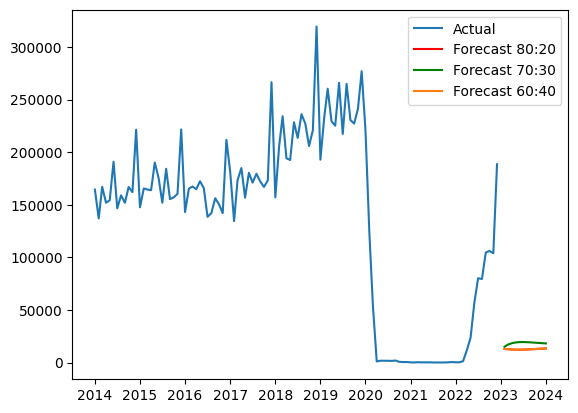

In [26]:
# Plot the results
plt.plot(data.index, data['total_visitor'], label='Actual')
plt.plot(future_dates, y_future_pred_inv, label='Forecast 80:20', color='red')
plt.plot(future_dates_30, y_future_pred_inv_30, label='Forecast 70:30', color='green')
plt.plot(future_dates_40, y_future_pred_inv_40, label='Forecast 60:40')
plt.legend()
plt.show()